In [1]:
# import libraries

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma

import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

print ('libraries imported')

libraries imported


In [59]:
# define variables

period= 'lig127k'

In [47]:
# read files

PMIP3_lig127k_diff_amm_pr_regression_mon = xr.open_dataset('/Users/milesrc/Desktop/dissertation/outputs/netcdf/PMIP3_lig127k_diff_amm_pr_regression_mon.nc', decode_times=False) 

print ('files read')

files read


In [48]:
PMIP3_lig127k_diff_amm_pr_regression_mon_mean = PMIP3_lig127k_diff_amm_pr_regression_mon.mean(dim='gcms', skipna=True, keep_attrs=True)

In [49]:
PMIP3_lig127k_diff_amm_pr_regression_mon_mean

<xarray.Dataset>
Dimensions:                (lat: 180, lon: 360)
Coordinates:
  * lat                    (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                    (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
Data variables:
    amm_pr_regression_mon  (lat, lon) float64 0.002309 0.002309 ... -0.00563

In [50]:
#annual mean PPT anomalies --> put hashtags in front of variable names not being used 


variable_name= 'amm_pr_regression_mon'
#variable_name= 'atl3_pr_regression_mon'

expt_a=PMIP3_lig127k_diff_amm_pr_regression_mon_mean[variable_name]

lat=PMIP3_lig127k_diff_amm_pr_regression_mon_mean['lat']
lon=PMIP3_lig127k_diff_amm_pr_regression_mon_mean['lon']

In [51]:
expt_a, lon = add_cyclic_point(expt_a, coord=lon)

In [52]:
expt_a

masked_array(
  data=[[ 0.00230895,  0.00230895,  0.00230895, ...,  0.00230895,
          0.00230895,  0.00230895],
        [ 0.00076922,  0.00051774, -0.00010848, ...,  0.00094947,
          0.0008968 ,  0.00076922],
        [-0.00230856, -0.00306352, -0.0049403 , ..., -0.00176863,
         -0.00192596, -0.00230856],
        ...,
        [-0.02340718, -0.02164247, -0.01560308, ..., -0.02228254,
         -0.02374106, -0.02340718],
        [-0.01155806, -0.0109688 , -0.00895591, ..., -0.0111822 ,
         -0.0116694 , -0.01155806],
        [-0.00563023, -0.00563023, -0.00563023, ..., -0.00563023,
         -0.00563023, -0.00563023]],
  mask=False,
  fill_value=1e+20)

In [57]:
#plotting 

#temperatures

cmap= plt.get_cmap('BrBG') #define colour map

#define colormap's range and scale

clim=[-1.6,1.6]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

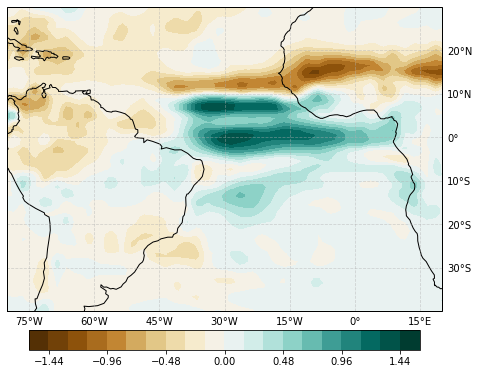

In [58]:
#regional map 

region=[-80, 20, -40, 30] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat, expt_a, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
plt.colorbar(fig,cax=cax, extend='both', **kw)

plt.savefig('/Users/milesrc/Desktop/dissertation/outputs/figs/ppt_ensemble_avg/PMIP3_lig127k_diff_amm_pr_regression_mon.png')

In [ ]:
#Global map

projection = ccrs.Robinson()
transform= ccrs.PlateCarree()
plt.figure(figsize=(10,7))
ax = plt.axes(projection=projection)
ax.coastlines()
ax.gridlines()

fig = ax.contourf(lon, lat, expt_a, levels=bounds, transform=transform, cmap=cmap, norm=norm)
cax,kw = matplotlib.colorbar.make_axes (ax, location = 'bottom', pad =0.05, shrink = 0.7)
plt.colorbar (fig, cax=cax, extend= 'both', **kw)

print('done')